In [4]:
'''
Initializes python packages and give paths to appropriate files to be used like categories file,
the twitter file to be used alongwith the default stopword list (This is where our own created stoplist will be declared too).
'''
from __future__ import print_function
from IPython.display import display
import datetime, calendar, nltk, string, math
from gensim.models import Phrases
path = r'C:\Users\shilp\Documents' 
stopwords_file, categories_file = path+'\\stopwords.txt', path+'\\Category_DomainTerms.txt' # {(category, term)}
out_fname,out_fname_cluster = path+'\\new_data_file.csv',path+'\\cluster_data_file.csv'
n_topics, seed_ratio = 5, 0.25
max_df, min_df = 0.5, 0.1 # For the VSM
topic_groups=[]
import warnings, matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
#from rirdc_lib_old import cleanUp, calculate_seed
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()
import csv
def keywithmaxval(d):
    v=list(d.values());k=list(d.keys())
    return k[v.index(max(v))]
value=int(input("1 for twitter and 2 for patents"))
if value==1:
    data_file=path+'\\results-20170725-145833.csv'
elif value==2:
    data_file=path+'\\urlpatentout2017_1.csv'
print('Loading packages and file paths declarations done...')

1 for twitter and 2 for patents1
Loading packages and file paths declarations done...


In [5]:
#Creates a new file from the tweet file by getting rid of rows that are incomplete by appending their content to the 
#preceding row and deleting blank rows
from nltk.stem import WordNetLemmatizer; wnl = WordNetLemmatizer()
extra_cats_file=path+'\\extra_cats.txt'
test_file=open(data_file,encoding="ISO-8859-1")
twitter_file = open(out_fname_cluster, 'w',encoding="ISO-8859-1",newline='')
reader = csv.reader(test_file, delimiter=',')
writer = csv.writer(twitter_file)
next(reader,None)
prev=reader
for row in reader:
    if row[0] in (None, ""):
        continue
    for term in row[3]:
        print(term)
        if term.isalpha()==False or ord(term) > 127 or math.isnan(term)==:
            row[3]=row[3].replace(term,' ')
        wnl.lemmatize(term,'n')
    writer.writerow(row)
test_file.close()
twitter_file.close()
print('Done Creating the cleaned version of tweet file...')
from collections import defaultdict
from nltk.corpus import wordnet as wn

# Loading the Wordnet domains.
s2d = []
for i in open('C:\\nltk_data\\corpora\\wn-domains-3.2\\wn-domains-3.2-20070223', 'r'):
    ssid, doms = i.strip().split('\t')
    doms = doms.split()
    for d in doms:
        s2d.append(d)
synset2domains=list(set(s2d))
extra_cats={}

for syn in synset2domains:
    try:
        p_list,c_list,categories=[],[],[]
        obj=wn.synset(syn+'.n.01')
        topics=obj.topic_domains()
        parents=obj.hypernyms()
        children=obj.hyponyms()
        domains= [ topic.lemma_names() for topic in topics ] 
        for sublist in domains:
            for item in sublist:
                    categories.append(str(item.replace('_',' ')))
        pwords = [ parent.lemma_names() for parent in parents ]
        for sublist in pwords:
            for item in sublist:
                    p_list.append(str(item.replace('_',' ')))
        cwords = [ child.lemma_names() for child in children]
        for sublist in cwords:
            for item in sublist:
                    c_list.append(str(item.replace('_',' ')))
        words=p_list+c_list
        if categories:
            for category in categories:
                extra_cats[category]=words
    except:
        pass

out_extra_cats = open(extra_cats_file, 'w')
for k in extra_cats.keys():
    for v in extra_cats[k]:
        out_extra_cats.write(k+", ")
        out_extra_cats.write(v+"\n")
out_extra_cats.close()
print("Done creating extra categories..")

Done Creating the cleaned version of tweet file...
Done creating extra categories..


In [6]:
#Creates the equal number of files for the unique months and locations present 
#in the data file and dumps corresponding tweets to the appropriate ones.

input_file = open(out_fname_cluster,encoding="ISO-8859-1")
date_list,country_list=[],[]
reader = csv.reader(input_file, delimiter=',')

#Creates a unique list of months and countries from tweets
for row in reader:
    created_at,*rest=row[1].split(' ')           #splits the 'Created at' column to retrieve 'month'
    year,months,date=created_at.split('-')
    month=calendar.month_name[int(months)]
    if month not in date_list:
        date_list.append(str(month))
'''
    if row[6] not in country_list:
        country_list.append(str(row[6]))
'''
#Creates csv files with names after months
for month in date_list:
    outfile = open(path+'\Data{0:2s}'.format(str(month))+'.csv', 'w', newline='',encoding="ISO-8859-1")
    writer = csv.writer(outfile, delimiter = ',')
    writer.writerow(["tweet_id","month","text","country"])
    outfile.close()
'''
#Creates csv files with names after countries
for country in country_list:
   outfile = open(path+'\Data{0:2s}'.format(str(country))+'.csv', 'w', newline='',encoding="ISO-8859-1")
   writer = csv.writer(outfile, delimiter = ',')
   writer.writerow(["tweet_id","month","text","country"])
   outfile.close()
'''
#Shifts rows of tweets to their respective csv files  -->  For Months
for month1 in date_list:
  with open(out_fname_cluster, 'r',encoding="ISO-8859-1") as f:
    reader = csv.reader(f, delimiter=',')
    outfile = open(path+'\Data{0:2s}'.format(str(month1))+'.csv','a', newline='',encoding="ISO-8859-1")
    for row in reader:
        if row[0] in (None, ""):
          continue
        created_at,*rest=row[1].split(' ')  
        year,months,date=created_at.split('-')
        month2=calendar.month_name[int(months)]
        if month1==month2:
            writer = csv.writer(outfile, delimiter =',')
            writer.writerow(row)
    outfile.close()
'''
#Shifts rows of tweets to their respective csv files  -->  For Countries
for country1 in country_list:
  with open(out_fname, 'r',encoding="ISO-8859-1") as f:
    reader = csv.reader(f, delimiter=',')
    outfile = open(path+'\Data{0:2s}'.format(str(country1))+'.csv','a', newline='',encoding="ISO-8859-1")
    for row in reader:
        if row[0] in (None, ""):
          continue
        country2=str(row[6])
        if country1==country2:
            writer = csv.writer(outfile, delimiter =',')
            writer.writerow(row)
    outfile.close()
'''
print('Done moving tweets to their respective months and location files...')

Done moving tweets to their respective months and location files...


In [7]:
#Tokenizes and remove stopwords from the tweet column of the data file for bigrams and unigrams --> For Months

df=open(stopwords_file,"r",encoding="ISO-8859-1", errors='replace')
stops=df.readlines(); df.close()
stops = set([word.strip() for word in stops])                  #stores stopwords tokens from the stoplist in a list
stops1=list(stops)
stops2=''.join(stops1)
tweet_id_m, text_m={},{}
tweet_id_c,text_c={},{}
docs,r=[],[]
sentences=[]
DocZ_m, DocZ_c, DocZ_m_wob, DocZ_c_wob = {},{},{},{} # will be used to find categories
for month in date_list:
    u,p,d,d_wob=[],[],[],[]
    outfile = open(r'C:\Users\shilp\Documents\Data{0:2s}'.format(str(month))+'.csv', 'r', newline='',encoding="ISO-8859-1")
    reader = csv.reader(outfile, delimiter=',')
    next(reader,None)
    docs=list(reader);
    for doc in docs:    
        tmp = [t.strip() for t in doc]
        try:
            if len(tmp[3])>0: # Making sure not blanks
                sentence = [word
                    for word in nltk.word_tokenize(tmp[3].lower())
                    if word not in string.punctuation
                           and len(word)>3
                           ]
                filtered_word_list = sentence[:] #make a copy of the word_list
                for term in sentence: # iterate over word_list
                    if term in stops2: 
                        filtered_word_list.remove(term)
                d_wob.append(tmp[3].lower())                  #Unigrams List
                sentences.append(filtered_word_list)                  #Bigrams List
                filtered=' '.join(filtered_word_list)
                u.append(tmp[0]); p.append(tmp[3]);d.append(filtered)
        except:
            pass
    tweet_id_m[month]=u
    text_m[month]=p 
    DocZ_m[month]=d
    DocZ_m_wob[month]=d_wob
   
print("For the months found")
print("The bigrams are -->", DocZ_m)
#print("The unigrams are -->", DocZ_m_wob)

#Gets the top five bigrams
flat_list = [item for sublist in sentences for item in sublist]
word_counter = {}
for word in flat_list:
     if word in word_counter:
        word_counter[word] += 1
     else:
         word_counter[word] = 1
popular_words = sorted(word_counter, key = word_counter.get, reverse = True)
top_5 = popular_words[:5]
print("The top five bigrams are",top_5)
del u,p,d,d_wob,sentence
    
del docs
print("Clean-up for months done...,", end = ' ', flush = True)  

For the months found
The bigrams are --> {'August': ['kirstymac borispingpong tried looks little', 'bringing elegance modernity dish luqrtgo businesstravel travel', 'eerickami cute julian casablogging xemwiw', '', 'kiwi verb stimpy steffizp lewisstark lydaly ttlypalmerised ohboyyes', 'avoid payment headaches good invoice processes plyyk', 'correctly answered questions pewresearch newsiq quiz zcywp', 'saints dragons mmbrenn johndory easy mate kick house', 'stunning seline xzegayu', 'skin looking started good skincare work', 'making today crunchy date granola mishdelishtweet cfwnd', 'awards getting action xfipvv', 'gilliana start files lego campaign ynrpf', 'johnny', 'jackwynands dril cosplayer jpfjd', 'bidding items begun please post follow instructions registered vzdo', 'pombo pablo gugalusto posible hablar empezar cuestionar vota cambiemos', 'spideeric little bitch', 'beennyybooyy said girl difference girls girl', 'aflcanberra preview uvldzfqxam', 'premier house wellington aqwz', 'aas

In [8]:
#transforming the corpus into vector space using tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer,tfidf_matrix,terms={},{},{}
for m in date_list:
    tfidf_vectorizer[m] = TfidfVectorizer(max_df=0.5, max_features=200000,
                                 min_df=10,stop_words='english', ngram_range=(1,3))
    tfidf_matrix[m] = tfidf_vectorizer[m].fit_transform(DocZ_m[m]) #fit the vectorizer to tweets
    terms[m] = tfidf_vectorizer[m].get_feature_names()
print(terms)
print("VSM done...")

{'August': ['abbott', 'abcnews', 'alpconf', 'amazing', 'article', 'ashton', 'asylum', 'auspol', 'aussie', 'australia', 'australian', 'available', 'away', 'awesome', 'baby', 'backs', 'beautiful', 'believe', 'benpobjie', 'best', 'better', 'billshortenmp', 'birthday', 'bishop', 'black', 'blog', 'boat', 'book', 'boys', 'breakfast', 'bronwyn', 'bronwyn bishop', 'business', 'businesstravel', 'businesstravel travel', 'called', 'calling', 'canberra', 'care', 'change', 'check', 'children', 'choppergate', 'club', 'coffee', 'cool', 'country', 'cute', 'daily', 'days', 'different', 'doing', 'enjoy', 'face', 'family', 'fans', 'feel', 'feeling', 'finally', 'follow', 'forget', 'forward', 'friday', 'friends', 'fuck', 'fucking', 'funny', 'game', 'gets', 'getting', 'girl', 'girls', 'going', 'gonski', 'good', 'government', 'great', 'growingupwithglasses', 'guys', 'haha', 'half', 'happens', 'happy', 'happy birthday', 'hard', 'having', 'head', 'health', 'heard', 'heart', 'hell', 'high', 'hope', 'house', 'il

In [9]:
#clustering the documents using the k-means algorithm
from sklearn.cluster import KMeans
clusters={}
num_clusters = 5        #specify the number of clusters here
km = KMeans(n_clusters=num_clusters,random_state=4000)
for m in date_list:
    km.fit(tfidf_matrix[m])
    clusters[m] = km.labels_.tolist()
print("Clustering done..")

Clustering done..


In [10]:
#creates a dictionary for cluster-docs pair
import pandas as pd
tweets,frame,mydict={},{},{}
for m in date_list:
    tweets[m] = { 'tweets': DocZ_m[m], 'cluster': clusters[m] }
    frame[m] = pd.DataFrame(tweets[m], index=None,columns = ['tweets', 'cluster'])
    #frame['cluster'].value_counts()
    mydict[m]={k: list(v) for k,v in frame[m].groupby("cluster")["tweets"]}
print(mydict)

{'August': {0: ['nowplaying baby sense calm', 'marian abandoned baby girl years baby grew back revenge bitter pill utrwd', 'baby', 'baby carrots save hunger', 'love baby john krasinski', 'gets morning work finish baby hjnbxhy', 'mother accused murdering week baby remains cells brief mention mmgdmgm newcastleherald', 'just baby weeks sandrabland goals arikhi', 'samrigney mother accused murdering week baby remains cells brief mention mmgdmgm newcastleh', 'program currently spend trawling programs attending events hard take baby writers fest'], 1: ['kirstymac borispingpong tried looks little', 'bringing elegance modernity dish luqrtgo businesstravel travel', 'eerickami cute julian casablogging xemwiw', '', 'kiwi verb stimpy steffizp lewisstark lydaly ttlypalmerised ohboyyes', 'avoid payment headaches good invoice processes plyyk', 'correctly answered questions pewresearch newsiq quiz zcywp', 'saints dragons mmbrenn johndory easy mate kick house', 'stunning seline xzegayu', 'skin looking s

In [11]:
# Loading categories into category dictionary of set of terms for bigrams and unigrams 

print("Please wait (it's going to take a while): Loading Data,", end = ' ', flush = True)
df=open(categories_file,"r",encoding="ISO-8859-1", errors='replace')
cats=df.readlines(); df.close(); categories = {}
for cat in cats:
     key = cat.split(', ')[0].strip(); term = cat.split(', ')[1].strip().lower()
     try:        
          categories[key].add(term)
     except:
          categories[key] = set([term])               #stores categories-terms as a key-value in a dictionary from the file
del cats,df

df=open(extra_cats_file,"r",encoding="ISO-8859-1", errors='replace')
cats=df.readlines(); df.close(); 
for cat in cats:
     key = cat.split(', ')[0].strip(); term = cat.split(', ')[1].strip().lower()
     try:        
          categories[key].add(term)
     except:
          categories[key] = set([term])               #stores categories-terms as a key-value in a dictionary from the file
del cats,df
print("pre-Categories mapping ... ", flush = True)    
doc_cats_m,doc_cat_m = {}, {}; 
doc_cats_m_wob,doc_cat_m_wob={},{};
for month in date_list:
  doc_cats_m[month],doc_cat_m[month]={},{} 
  for cluster_id in range(0,num_clusters):
     doc_cats_m[month][cluster_id],doc_cat_m[month][cluster_id]={},{}
     for idx,doc in enumerate(mydict[month][cluster_id]):
        notInCategories,total=[],0
        doc_cats_m[month][cluster_id][idx]={}
        for cat, terms in categories.items():
            for term in terms:
                n = doc.count(term)              #calculates the frequency of occurance of terms corresponding to terms for the category
                total+=n
                try:
                    doc_cats_m[month][cluster_id][idx][cat] += n
                except:
                    doc_cats_m[month][cluster_id][idx][cat]= n
        for cat, terms in categories.items():
            if total==0:
                doc_cat_m[month][cluster_id][idx] = None
                doc_cats_m[month][cluster_id][idx][cat] = 0.0
                if month not in notInCategories:
                    notInCategories.append(month)
            else:
                doc_cat_m[month][cluster_id][idx] = keywithmaxval(doc_cats_m[month][cluster_id][idx])           # category of doc[idx]
                doc_cats_m[month][cluster_id][idx][cat] = doc_cats_m[month][cluster_id][idx][cat]/total          # Normalizing to category's ratio
                
del doc
print(doc_cat_m)
print('%d/%d Documents were not in any of the categories.' %(len(notInCategories), len(mydict)), flush = True)

Please wait (it's going to take a while): Loading Data, pre-Categories mapping ... 
{'August': {0: {0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: 'information processing system', 7: None, 8: 'information processing system', 9: None}, 1: {0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: 'information processing system', 8: None, 9: None, 10: None, 11: None, 12: 'information processing system', 13: None, 14: None, 15: None, 16: None, 17: None, 18: 'information processing system', 19: None, 20: None, 21: None, 22: None, 23: None, 24: None, 25: None, 26: None, 27: 'mining', 28: None, 29: None, 30: None, 31: 'information processing system', 32: None, 33: None, 34: None, 35: None, 36: None, 37: 'information processing system', 38: None, 39: None, 40: None, 41: None, 42: None, 43: 'information processing system', 44: None, 45: None, 46: None, 47: 'mining', 48: None, 49: None, 50: None, 51: None, 52: 'information processing system', 53: 'finance', 54: 'finance', 55: 

In [12]:
#Calculates a score for each domain for each document
topic_categories_freq, topic_categories_score = {}, {}
for month in date_list:
 topic_categories_freq[month],topic_categories_score[month]={},{}
 for cluster_id in range(0,num_clusters):
#topics_groups = [[1,12],[2,18],[3,7,9,14,15,19],[4],[5],[6,8,11],[10,13,16,17],[20]] # Change this depending on the visualization result; PS: this is "LDAtopic+1"
#topics_scores, seeds, seeds_score, clusters, centroids, mse = {}, {}, {}, {}, {}, {}
      topic_categories_freq[month][cluster_id], topic_categories_score[month][cluster_id] = {}, {}
      temp=[]  
      for k,v in doc_cat_m[month][cluster_id].items():
        C=doc_cat_m[month][cluster_id][k]
        temp.append(doc_cat_m[month][cluster_id][k])
        if C: #not None
            try:
                topic_categories_freq[month][cluster_id][C]+=1
                topic_categories_score[month][cluster_id][C]+=doc_cats_m[month][cluster_id][k][C]
            except:
                topic_categories_freq[month][cluster_id][C]=1
                topic_categories_score[month][cluster_id][C]=doc_cats_m[month][cluster_id][k][C]
        else:
            try:
                topic_categories_freq[month][cluster_id]['None']+=1
            except:
                topic_categories_freq[month][cluster_id]['None']=1  
      for k,v in categories.items():
        if k not in temp:
            topic_categories_freq[month][cluster_id][k]=0.0
            topic_categories_score[month][cluster_id][k]=0.0
    # Normalizing scores
      for C in topic_categories_freq[month][cluster_id].keys():
        if C is not 'None':
            N = topic_categories_freq[month][cluster_id][C]
            if N !=0:
                topic_categories_score[month][cluster_id][C] = topic_categories_score[month][cluster_id][C]/N
            else:
                topic_categories_score[month][cluster_id][C] = 0.0
      if topic_categories_freq[month][cluster_id]['agriculture'] == topic_categories_freq[month][cluster_id]['finance'] == topic_categories_freq[month][cluster_id]['mining'] == 0.0:
        topic_categories_freq[month][cluster_id]['None']=1 
      if topic_categories_score[month][cluster_id]['agriculture'] == topic_categories_score[month][cluster_id]['finance'] == topic_categories_score[month][cluster_id]['mining'] == 0.0:
        topic_categories_score[month][cluster_id]['None']=1 
print(topic_categories_freq)
print(topic_categories_score)
print ('Done assigning scores...')
    # doc_cats[idx][cat] ; 
    #seeds[str(topic)], seeds_score[str(topic)] = calculate_seed(dtm_tf,doc_topic,tf_terms,topic,categories,seed_ratio) # return Dictionary [categories]:{docs} ==> nested dict
    #clusters[str(topic)], centroids[str(topic)], mse[str(topic)] = ss_clustering(vsm_topics,seeds[str(topic)],doc_topic,topic) # k from len(seeds[str(topic)])

{'August': {0: {'armed services': 0.0, 'scientific discipline': 0.0, 'finance': 0.0, 'manufacture': 0.0, 'armed forces': 0.0, 'maths': 0.0, 'dramaturgy': 0.0, 'artistic creation': 0.0, 'information processing system': 2, 'commercial enterprise': 0.0, 'artistic production': 0.0, 'agriculture': 0.0, 'art': 0.0, 'science': 0.0, 'drama': 0.0, 'business': 0.0, 'linguistics': 0.0, 'math': 0.0, 'computing device': 0.0, 'theater': 0.0, 'architecture': 0.0, 'None': 1, 'industry': 0.0, 'computing machine': 0.0, 'computer': 0.0, 'military machine': 0.0, 'dramatic art': 0.0, 'theatre': 0.0, 'mathematics': 0.0, 'war machine': 0.0, 'business enterprise': 0.0, 'military': 0.0, 'data processor': 0.0, 'electronic computer': 0.0, 'mining': 0.0, 'meteorology': 0.0, 'dramatics': 0.0}, 1: {'armed services': 2, 'scientific discipline': 9, 'architecture': 0.0, 'armed forces': 0.0, 'math': 0.0, 'maths': 0.0, 'dramaturgy': 0.0, 'artistic creation': 1, 'information processing system': 337, 'commercial enterpris

In [13]:
from __future__ import print_function
words_dict,words,termss={},{},{}
for month in date_list:
    tfidf_vectorizer[month] = TfidfVectorizer(max_df=1.0, max_features=200000,
                                 min_df=9,stop_words='english', ngram_range=(1,3))
    termss[month] = {}
    words_dict[month],words[month]={},{}
    for cluster_id in range(0,num_clusters):
        tfidf_matrix[month] = tfidf_vectorizer[month].fit_transform(mydict[month][cluster_id])
        km.fit(tfidf_matrix[month])
        order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
        vocab_frame = pd.DataFrame({'words': mydict[month][cluster_id]}, index = mydict[month][cluster_id])
        words_dict[month][cluster_id]={}
        words[month][cluster_id]={}
        termss[month][cluster_id]=tfidf_vectorizer[month].get_feature_names()
        #sort cluster centers by proximity to centroid
        for ind in order_centroids[cluster_id, :6]: #replace 6 with n words per cluster
            words[month][cluster_id]=str(vocab_frame.ix[termss[month][cluster_id][ind].split(' ')].values.tolist()[0][0]).encode('ascii', 'ignore').decode()
        if cluster_id not in words_dict[month]:
            words_dict[month][cluster_id]=[]
        #print(words)
    for idx in range(0,num_clusters):
        word=words[month][idx]
        if word in words_dict[month][idx] or word=='nan':
                continue
        else:
                words_dict[month][idx]=word
print(words_dict)

{'August': {0: 'baby', 1: {}, 2: 'photo', 3: {}, 4: {}}, 'October': {0: {}, 1: {}, 2: {}, 3: {}, 4: {}}, 'September': {0: {}, 1: {}, 2: {}, 3: {}, 4: {}}, 'July': {0: {}, 1: {}, 2: {}, 3: {}, 4: {}}}


For month July
For Cluster ID 0
Visualization based on Category frequency: 


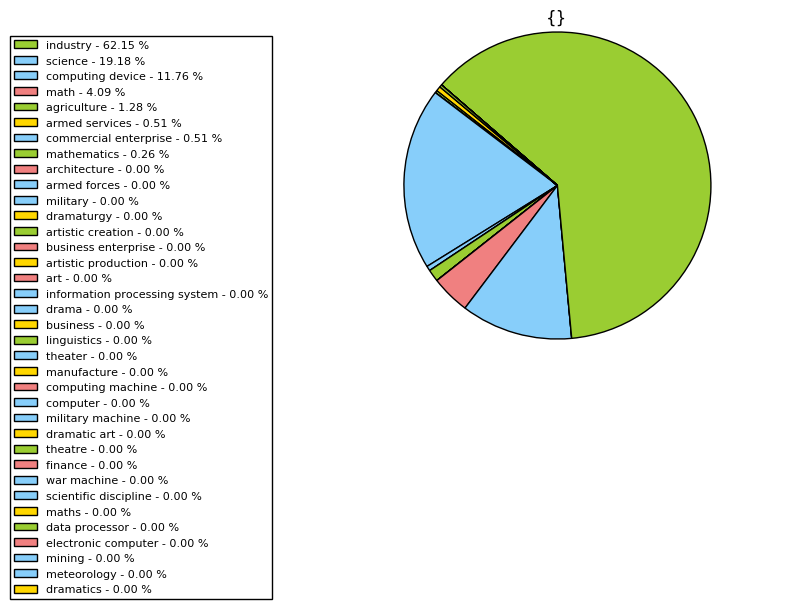

For Cluster ID 1
Visualization based on Category frequency: 


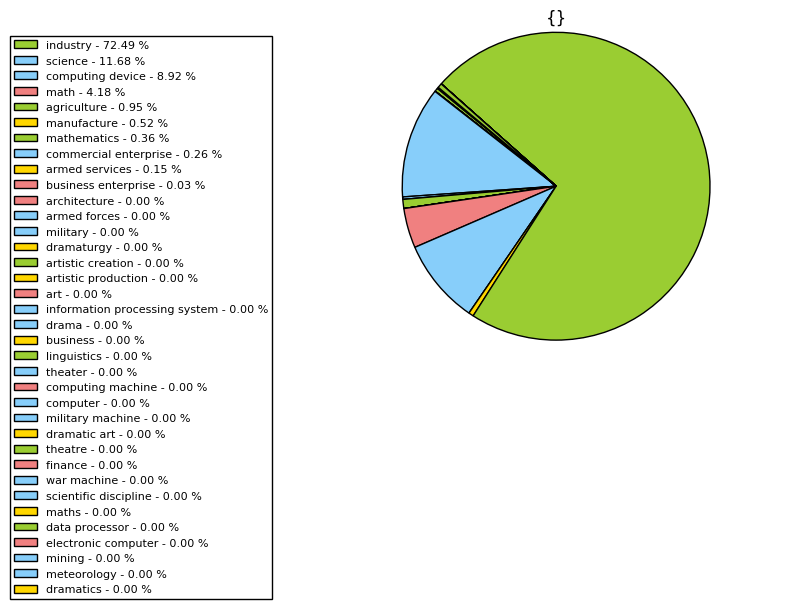

For Cluster ID 2
Visualization based on Category frequency: 


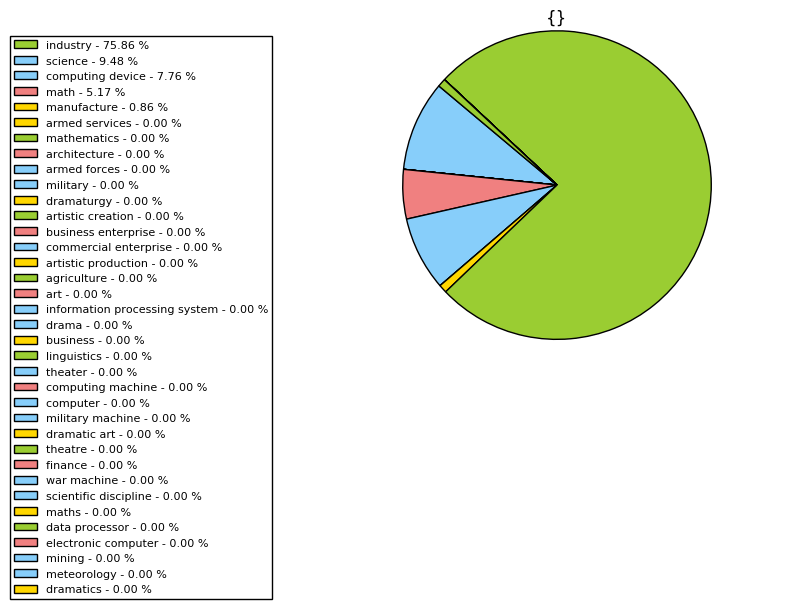

For Cluster ID 3
Visualization based on Category frequency: 


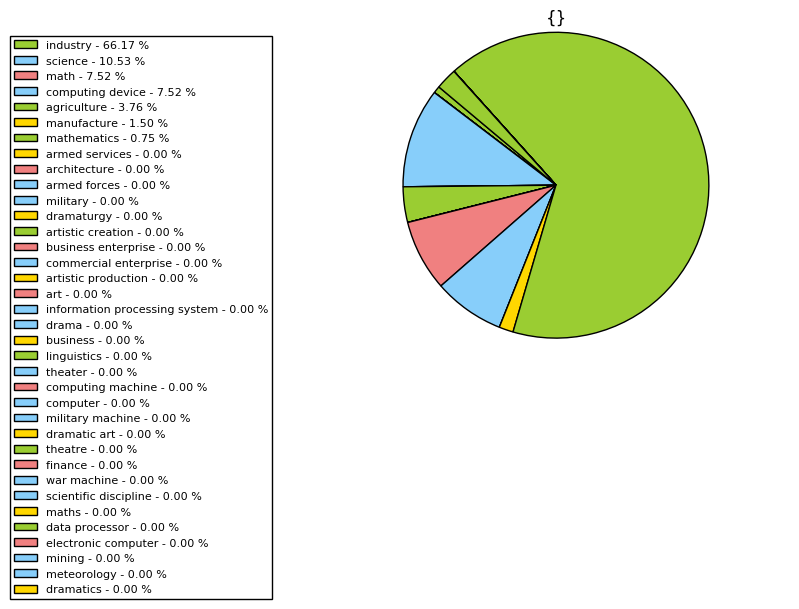

For Cluster ID 4
Visualization based on Category frequency: 


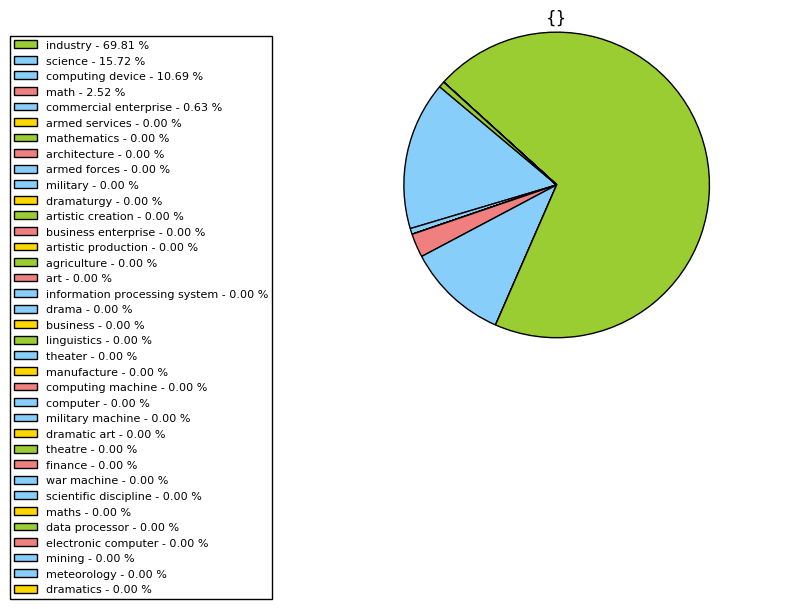

For month August
For Cluster ID 0
Visualization based on Category frequency: 


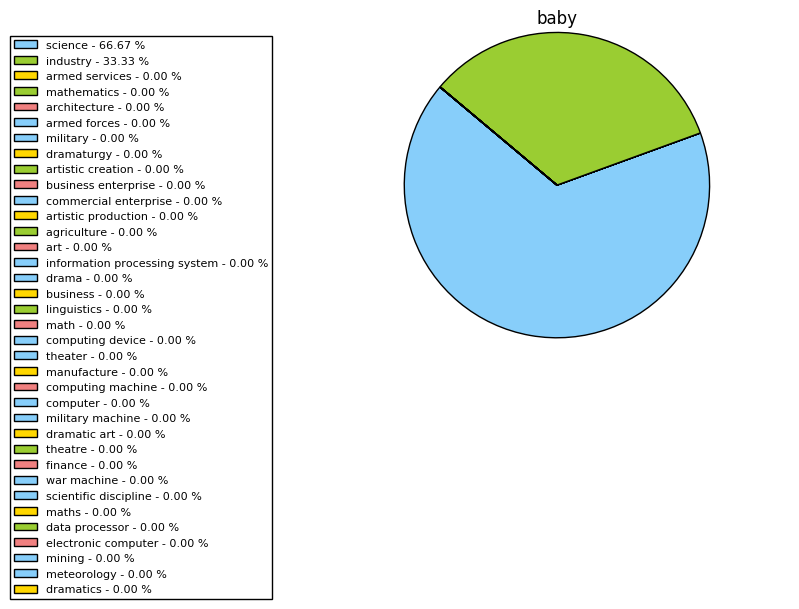

For Cluster ID 1
Visualization based on Category frequency: 


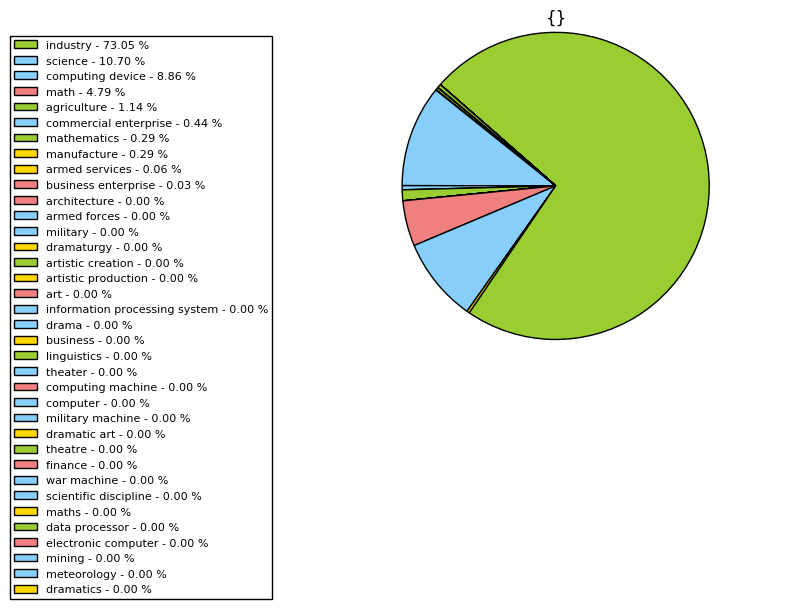

For Cluster ID 2
Visualization based on Category frequency: 


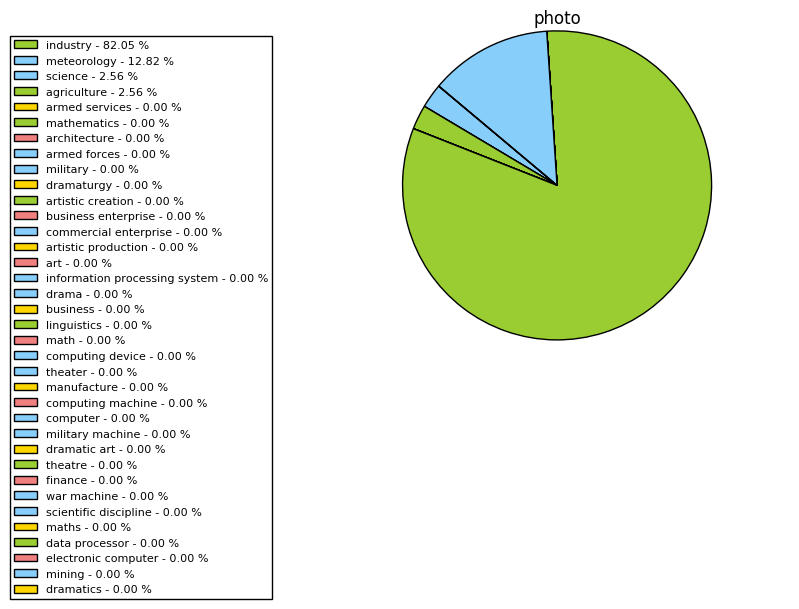

For Cluster ID 3
Visualization based on Category frequency: 


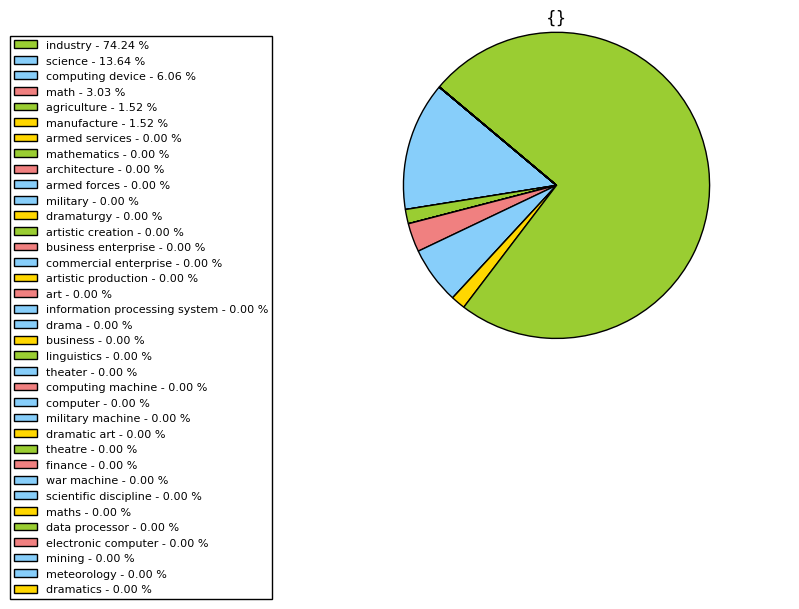

For Cluster ID 4
Visualization based on Category frequency: 


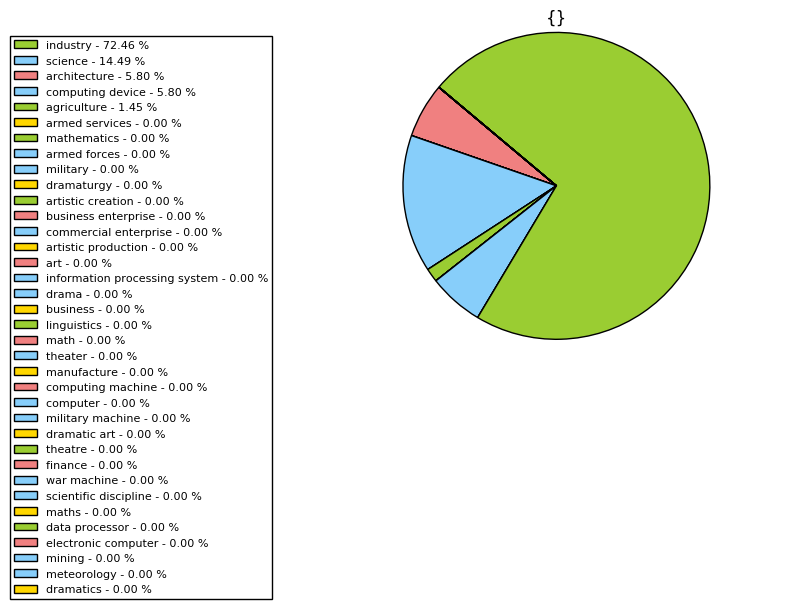

For month September
For Cluster ID 0
Visualization based on Category frequency: 


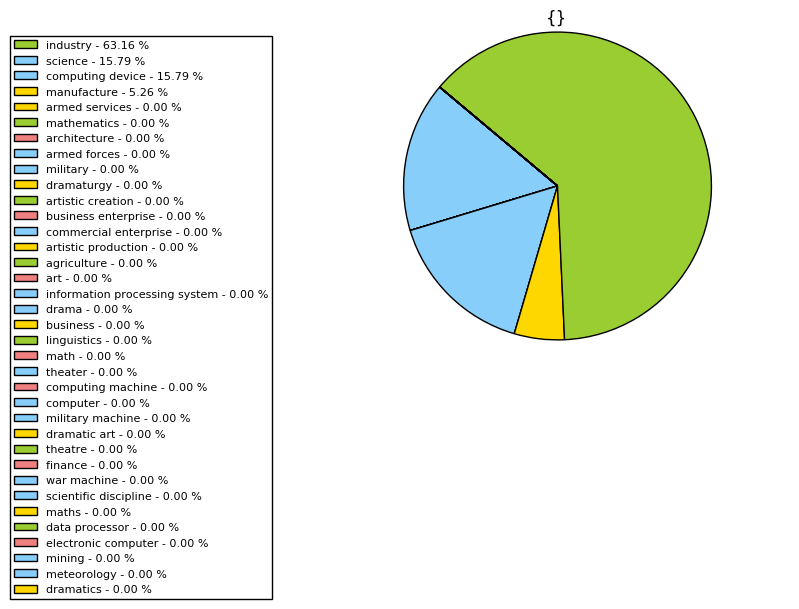

For Cluster ID 1
Visualization based on Category frequency: 


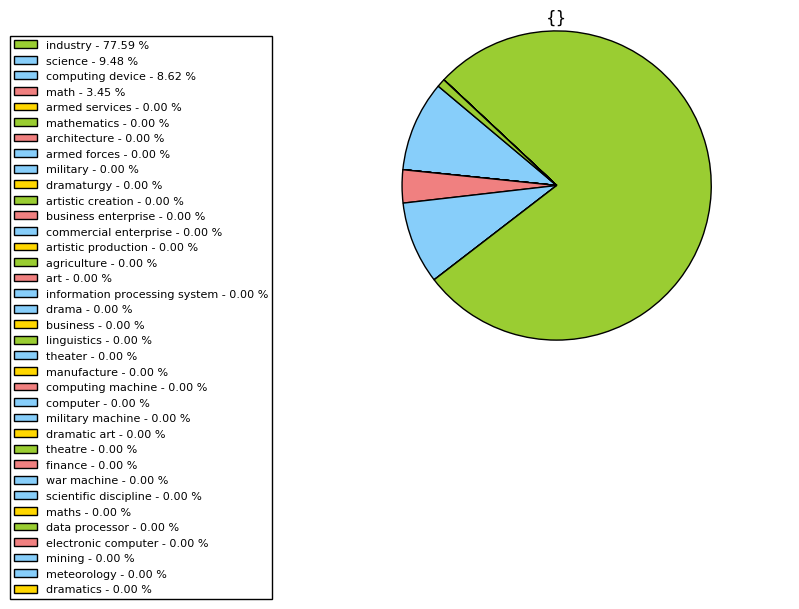

For Cluster ID 2
Visualization based on Category frequency: 


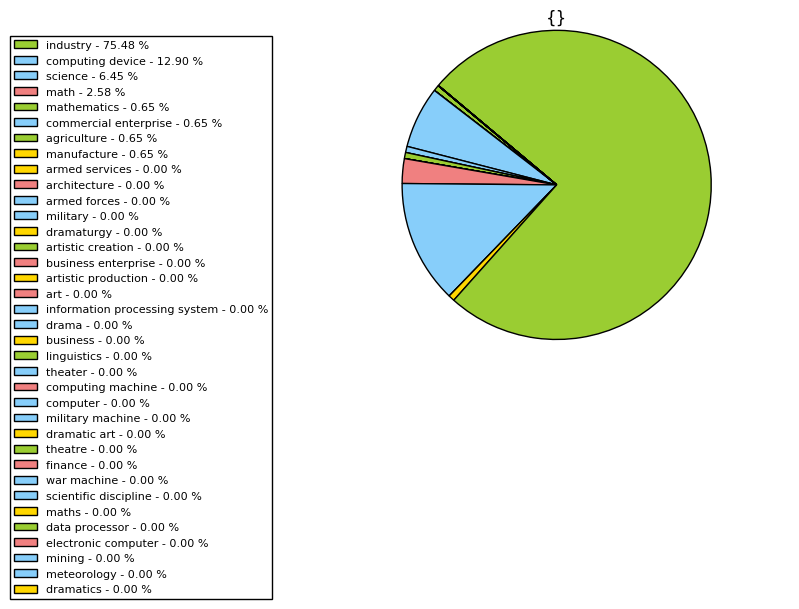

For Cluster ID 3
Visualization based on Category frequency: 


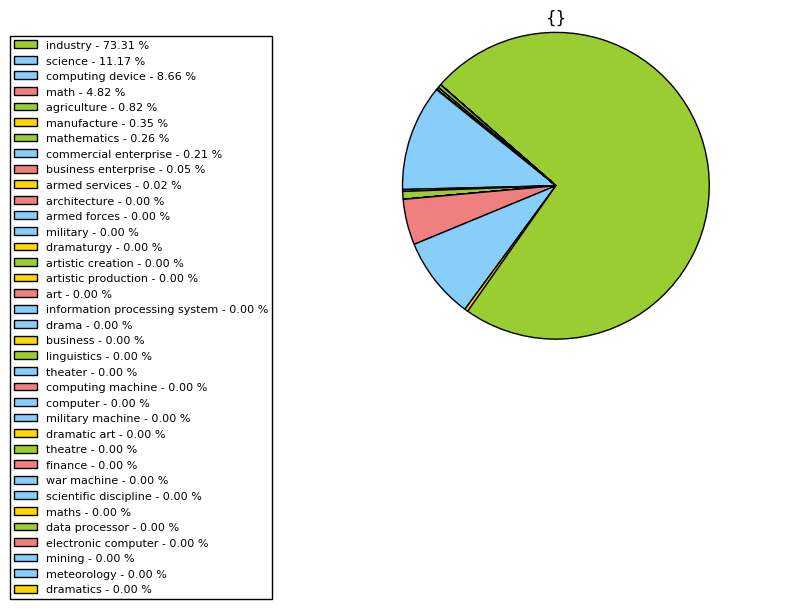

For Cluster ID 4
Visualization based on Category frequency: 


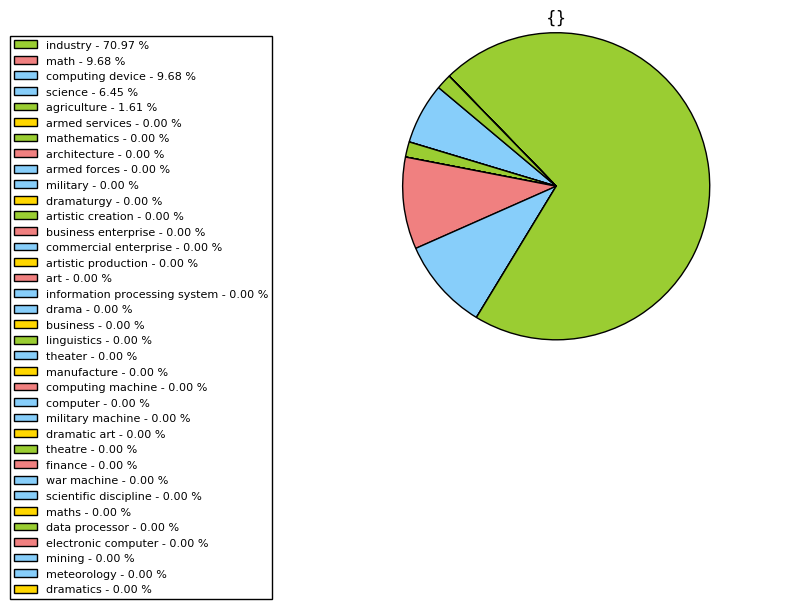

For month October
For Cluster ID 0
Visualization based on Category frequency: 


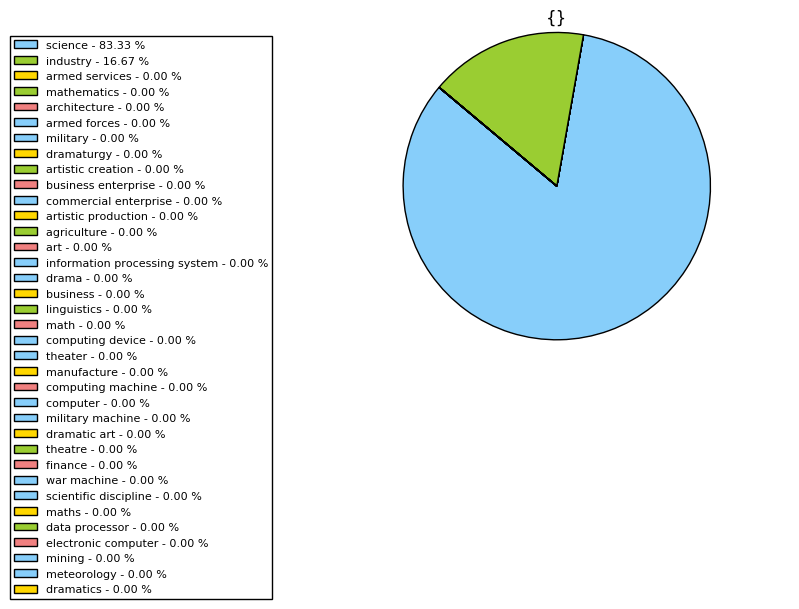

For Cluster ID 1
Visualization based on Category frequency: 


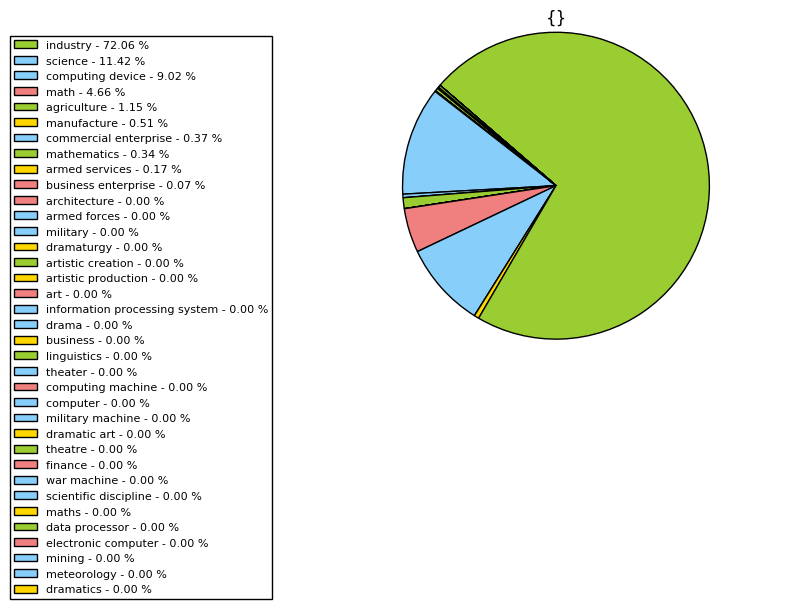

For Cluster ID 2
Visualization based on Category frequency: 


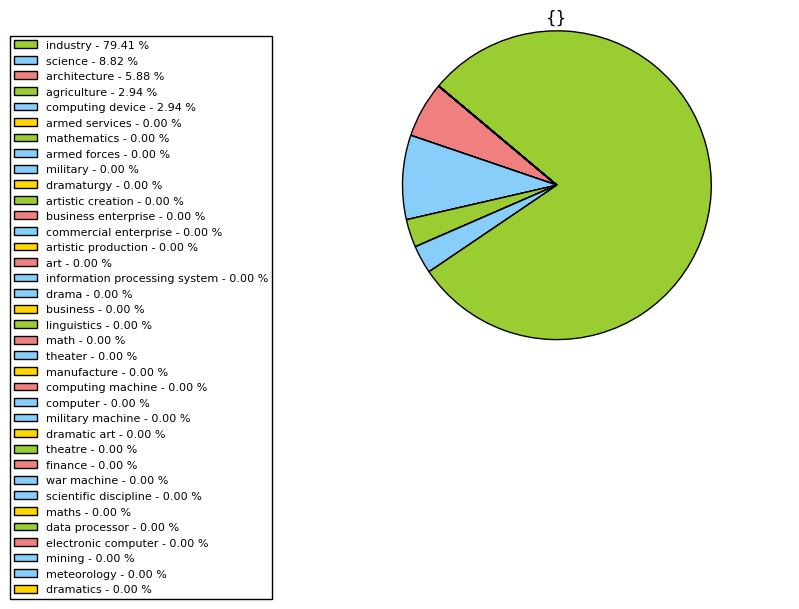

For Cluster ID 3
Visualization based on Category frequency: 


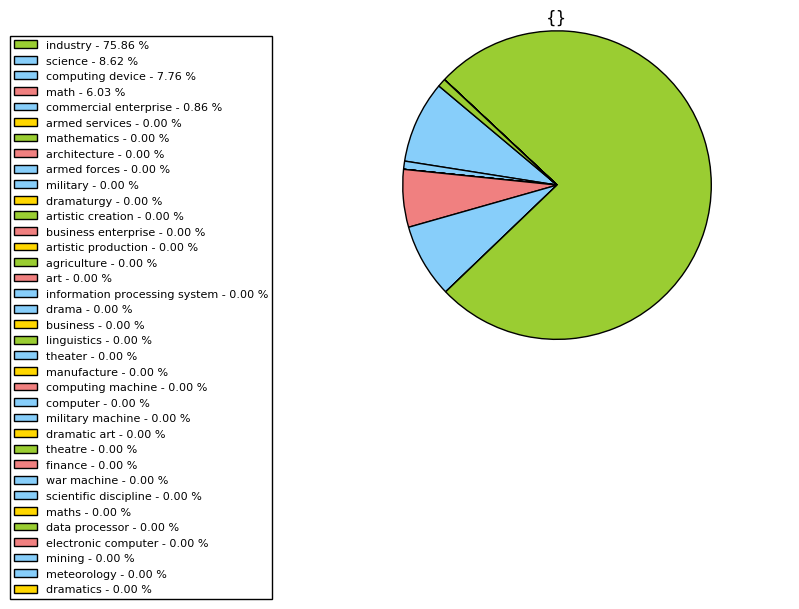

For Cluster ID 4
Visualization based on Category frequency: 


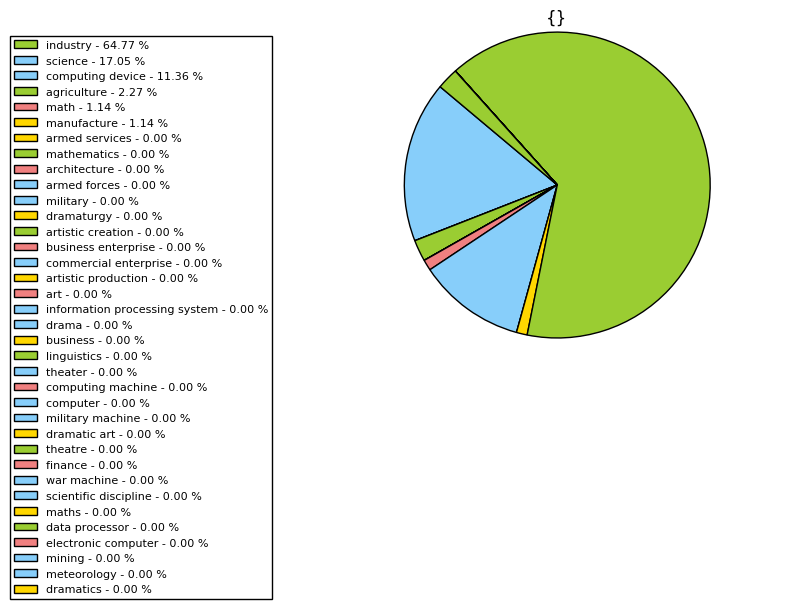

Done Visualising and saving pie charts...


In [14]:
#Creates a pie chart and saves it as a png file to be loaded later
import numpy as np
fileNameTemplate = path+'\Plot{0:s}'
category_list=list(categories.keys())
for month in date_list:
    print("For month",month)
    for cluster_id in range(0,num_clusters):
        print("For Cluster ID",str(cluster_id))
        print('Visualization based on Category frequency: ', flush = True)
        y=np.array(list(topic_categories_freq[month][cluster_id].values()))
        porcent = 100.*y/y.sum()
        labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(category_list, porcent)]
        sizes = list(topic_categories_freq[month][cluster_id].values())
        colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','lightskyblue'][:len(labels)]
        explode = (0.1, 0, 0, 0)  # explode 1st slice: Change this anyway you like
        patches,text=plt.pie(sizes, colors=colors, startangle=140)
        plt.title(words_dict[month][cluster_id])
        plt.axis('equal')
        sort_legend = True
        if sort_legend:
            patches, labels, dummy =  zip(*sorted(zip(patches, labels, sizes),
                                              key=lambda x: x[2],
                                              reverse=True))

        plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
               fontsize=8)
        plt.savefig(fileNameTemplate.format(str(month)+'-'+str(cluster_id)+'.png'), format='png', bbox_inches='tight')
        plt.show()
print('Done Visualising and saving pie charts...')

In [15]:
#Loads back the saved png pie charts to be displayed over cluster axis
import glob
import numpy as np
import ntpath
import matplotlib.image as mpimg
import os.path
fig, axarr = plt.subplots(nrows=len(date_list),ncols= num_clusters, sharex='col', sharey='row',  figsize=(40,5))
c=0   
r=0
if len(date_list)==1:
    axarr[0].yaxis.set_label_position("left")
    axarr[0].set_ylabel(date_list[0])
    c=0
    for col in range(0,num_clusters):
        ttl=''
        for top in col:
            ttl=ttl+mydict[str(top)]+','
        axarr[c].set_title(ttl)
        img=fileNameTemplate.format(str(col))+'-'+date_list[0]+'.png'
        o=axarr[c].imshow(mpimg.imread(img),interpolation='nearest', aspect='auto')
        plt.setp(axarr[c].get_xticklabels(), visible=False)
        plt.setp(axarr[c].get_yticklabels(), visible=False)
        c+=1
    
#else use numpy multi-dimesnional array
else:
     for row in date_list:
        c=0
        axarr[r].yaxis.set_label_position("left")
        axarr[r].set_ylabel(row)
        for col in range(0,num_clusters):  
            ttl=''
            ttl=ttl+str(words_dict[row][col])+','
            axarr[r].set_title(ttl)
            img=fileNameTemplate.format(str(row)+'-'+str(col))+'.png'
            print(img)
            o=axarr[r].imshow(mpimg.imread(img),interpolation='nearest',aspect='auto')
            plt.setp(axarr[r].get_xticklabels(), visible=False)
            plt.setp(axarr[r].get_yticklabels(), visible=False)
            c+=1
     r+=1
plt.show()
print("Done plotting for months...")
print("Done plotting ...")

AttributeError: 'numpy.ndarray' object has no attribute 'yaxis'